In [1]:
import cv2
# Create an MSER detector instance
mser = cv2.MSER_create()

# Load an image
image = cv2.imread('exp.jpeg', cv2.IMREAD_GRAYSCALE)

# Detect MSER regions
regions, _ = mser.detectRegions(image)

# Draw MSER regions on the image
output_image = image.copy()
for region in regions:
    x, y, w, h = cv2.boundingRect(region)
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv2.imshow('MSER Regions', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()






In [ ]:
import cv2
# Load image
image = cv2.imread('2.png', cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary image
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop over contours to find and highlight the smaller digit
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w * h < 9000 and w<100:  # Define a threshold area to determine "smallness"
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = image[y:y+h, x:x+w]
        # Display the extracted ROI
        cv2.imshow('Extracted ROI', roi)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Display the result
cv2.imshow('Highlighted Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import pytesseract
import sympy as sp
image = cv2.imread('2.png', cv2.IMREAD_COLOR)

# Extract text from the image using pytesseract
extracted_text = pytesseract.image_to_string(image)
parsed_expression = sp.sympify(extracted_text)

# Print the parsed expression
print(f"Parsed Expression: {parsed_expression}")

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
import cv2

# Load image
image = cv2.imread('2.png', cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

# Set thresholds for width and area
width_threshold = 30
area_threshold = 100
prev = 0

# Loop over contours to extract rectangular regions and identify exponents
exp = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi = image[y:y+h, x:x+w]
    exp.append([roi])
    print(y)
    # Check width and area conditions
    if y>(prev+20):
        # This is likely the exponent part
        exp[-1].append("expo")
        y = prev
    prev = y
cv2.imshow('Detected Exponents', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Display the result
for i in exp:
    cv2.imshow('Detected Exponents', i[0])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    if(len(i)==2):
        print(i[1])


130
10
234
105
120
89


In [ ]:
import cv2
import numpy as np

# Load the image
image_path = 'multi1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding with lower intensity
binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)
# Apply morphological operations with a larger kernel
kernel = np.ones((5, 5), np.uint8)
cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
binary_inverse_image = cv2.bitwise_not(cleaned_image)
# Find contours in the image
contours, _ = cv2.findContours(binary_inverse_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the detected lines on the original image
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the output image
cv2.imshow('Detected Lines', cleaned_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

# Load the image
image_path = 'multi1.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding to create a binary image
binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find horizontal projection profile
horizontal_projection = np.sum(binary_image, axis=1)

# Set a threshold to detect text lines
threshold = binary_image.shape[1] // 2

# Detect text line boundaries
text_line_boundaries = []
inside_text_line = False
for i, value in enumerate(horizontal_projection):
    if not inside_text_line and value > threshold:
        text_line_boundaries.append(i)
        inside_text_line = True
    elif inside_text_line and value <= threshold:
        inside_text_line = False

# Draw rectangles around detected text lines
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for top in text_line_boundaries:
    bottom = text_line_boundaries[top] + 1
    cv2.rectangle(output_image, (0, top), (output_image.shape[1], bottom), (0, 255, 0), 2)

# Display the output image
cv2.imshow('Text Line Segmentation', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


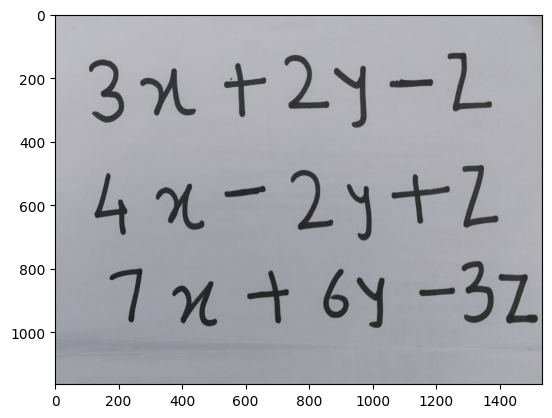

In [1]:
import matplotlib.pyplot as plt
import cv2
image_path = 'multi4.jpeg'
img = cv2.imread(image_path, cv2.COLOR_BGR2RGB)

h,w,c = img.shape

# if w>1000:
#     new_w = 1000
#     ar = w/h
#     new_h = int(new_w/ar)
#     img = cv2.resize(img, (new_w, new_h),  interpolation = cv2.INTER_AREA)

plt.imshow(img)
                      


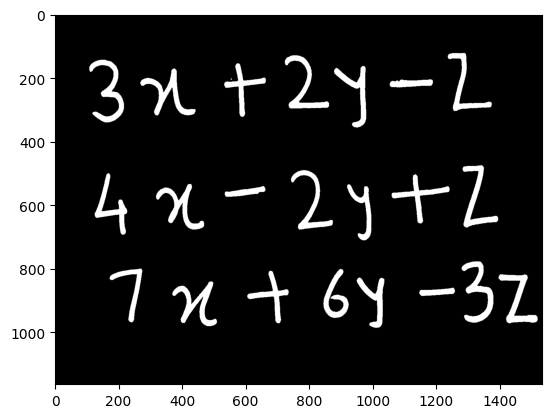

In [2]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rest, thresh = cv2.threshold(img_gray, 80, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

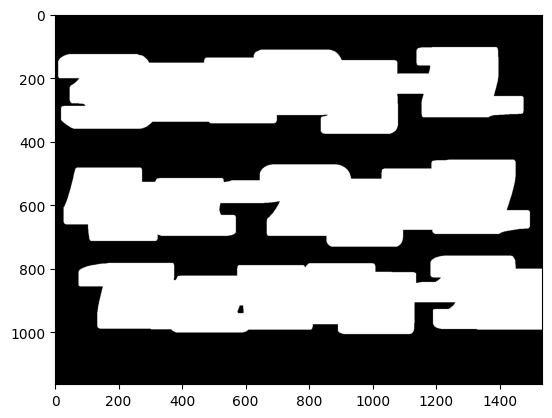

In [3]:
import numpy as np
kernel = np.ones((20, 100), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=2)
plt.imshow(dilated, cmap='gray')

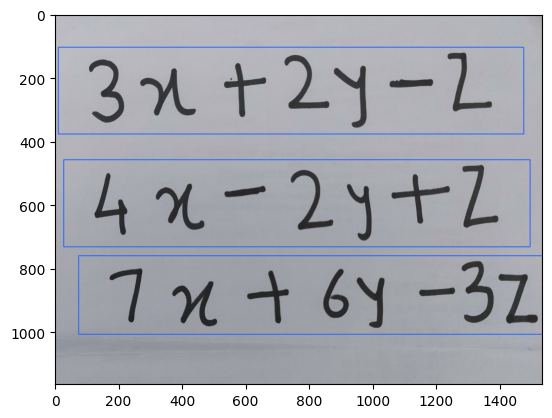

In [4]:
contours, heirarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[1]) #x,y,w,h
img2 = img.copy()
exp = []
for ctr in sorted_contours:
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x, y), (x+w, y+h), (40, 100, 250), 2)
    if ((x+w)-x)*((y+h)-y)>100000:
        roi = img[y:y+h, 50:1600]
        exp.append(roi)
plt.imshow(img2)



In [5]:
for i in exp:
    cv2.imshow('Text Line Segmentation', i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

57 39 111 199
218 67 175 149
481 51 133 169
672 25 141 169
827 59 103 195
1002 100 137 28
1185 18 139 184
normal
normal
normal
normal
normal
normal
normal
74 42 104 195
267 76 153 145
483 82 130 37
691 32 134 190
868 77 78 178
1008 46 184 156
1231 17 114 197
normal
normal
normal
normal
normal
normal
normal
121 40 104 171
319 80 141 143
554 47 132 167
793 41 81 156
898 68 89 160
1095 100 114 28
1229 17 101 195
1345 58 124 156
normal
normal
normal
normal
normal
normal
normal
normal


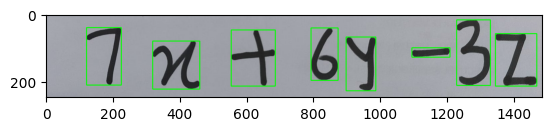

In [6]:

for i in exp:
    k = i.copy()
    gray = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])
    
    # Set thresholds for width and area
    width_threshold = 30
    area_threshold = 100
    prev = 0
    # Loop over contours to extract rectangular regions and identify exponents
    exp2 = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if((w*h)>700):
            cv2.rectangle(k, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi = i[y-3:y+h+3, x-3:x+w+3]
            # cv2.imshow('Detected Exponents', roi)
            # cv2.waitKey(0)
            if prev == 0:
                prev = y
            print(x, y, w, h)
            exp2.append([roi])
            if y<(prev-50):
                exp2[-1].append("expo")
            else:
                exp2[-1].append("normal")
    cv2.imshow('Detected Exponents', k)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # Display the result
    for l in exp2:
        cv2.imshow('Detected Exponents', l[0])
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        if(len(l)==2):
            print(l[1])
    # plt.imshow(k)

    #for every equation parse here using cnn and form string compatible to sympy {new 2} and append it in an array of equations
#calculate the equation in the array together and variable used in array

        